## Ejemplo de clasificación multiclase

Se trabajará con el conjunto de datos llamado [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Los datos ya están ordenados en entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# Visualizar la primera instancia de entrenamiento
print(f"Instancia de entrenamiento:\n{train_data[0]}\n") 
print(f"Etiqueta de la instancia: {train_labels[0]}")

Instancia de entrenamiento:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   

In [3]:
# Tamaño de los datos
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Tamaño de una instancia
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Se tiene 60 000 instancias de entrenamiento de tamaño (28, 28) y una etiqueta, así como 10 000 instancias de prueba de tamaño  (28, 28).


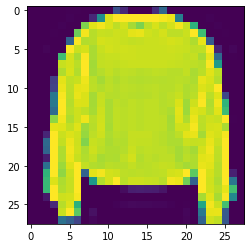

In [5]:
# Gráfico de una instancia
import matplotlib.pyplot as plt

plt.imshow(train_data[7]);

In [6]:
# Etiqueta de la instancia
train_labels[7]

2

El nombre de las clases se puede encontrar en el repositorio de Github de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist#labels)).


In [7]:
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

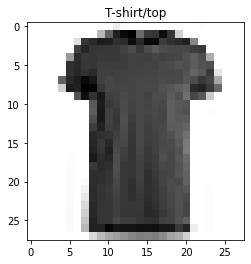

In [8]:
# Instancia y su etiqueta
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(nombres[train_labels[17]]);

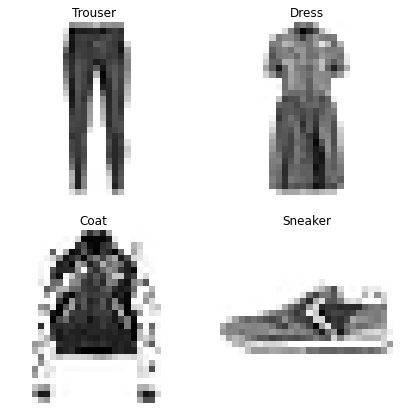

In [9]:
import random

plt.figure(figsize=(7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(nombres[train_labels[rand_index]])
  plt.axis(False)

Se construirá un modelo que trate sobre la relación entre los valores de los píxeles y sus etiquetas. 

Dado que es un problema de clasificación multiclase, se necesita realizar algunas modificaciones a la arquitectura:

* **Tamaño de entrada**: se tiene que considerar tensores de 28x28 = 784 (alto y ancho de las imágenes), es decir, un vector de tamaño 784

* **Tamaño de salida**: tendrá que ser 10, dado que se requiere que el modelo prediga 10 clases diferentes.
  * Se modificará la función de activación para que sea de tipo [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax). ESta función brinda una serie de valores entre 0 & 1 (el mismo tamaño que el tamaño de salida, que aproximadamente suma a 1. El índice con el valor más alto es predicho como la clase más probable.
* Para la función de costo se requiere utilizar la función de pérdida multiclase. 
  * Dado que las etiquetas son enteras, se utilizará [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy). Si las etiquetas estuviesen en formato one-hot (e.g. algo como `[0, 0, 1, 0, 0...]`), se utilizaría [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* Se utilizará el parámetro `validation_data` al utilizar la función `fit()`. Esto brindará una idea de cómo se comporta el movimiento en un conjunto de prueba durante el entrenamiento.


In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)), # Capa de entrada (la capa flatten convierte 28x28 en 784)
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax") # Capa de salida de tamaño 10 (softmax)
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs = 10,
                               validation_data = (test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [11]:
# Verificación del modelo
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


El modelo brinda aproximadamente 35% de exactitud (accuracy) luego de utilizar 10 épocas. Esto es mejor que algo completamente aleatorio donde, dado que se tiene 10 clases, se predeciría cada una con 10% de probabilidad. 

Para mejorar este comportamiento se puede normalizar los datos (llevarlos a un rango entre 0 y 1). 

In [12]:
# Verificación del mínimo y máximo 
train_data.min(), train_data.max()

(0, 255)

In [13]:
# Dividir los datos de las imágenes entre el máximo valor (255)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Verificar el valor mínimo y máximo actual
train_data.min(), train_data.max()

(0.0, 1.0)

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

norm_history = model_2.fit(train_data,
                           train_labels,
                           epochs = 10,
                           validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Para visualizar mejor qué está sucediendo, se puede graficar las curvas de pérdida.

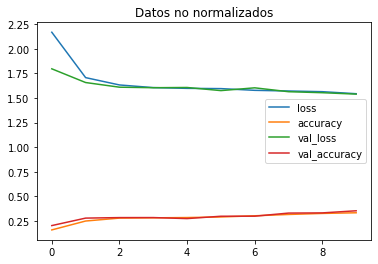

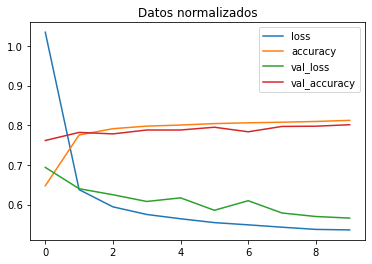

In [15]:
import pandas as pd

# Curvas de pérdida de los datos no normalizados
pd.DataFrame(non_norm_history.history).plot(title="Datos no normalizados")

# Curvas de pérdida de los datos normalizados
pd.DataFrame(norm_history.history).plot(title="Datos normalizados");

A partir de estos gráficos, se observa que el modelo con datos normalizados "aprende" mucho más rápido que el modelo sin normalización.

A continuación se modificará el factor de aprendizaje (learning rate)

In [16]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Creación de un "callback" para el factor de aprendizaje
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Entrenamiento del modelo
find_lr_history = model_3.fit(train_data,
                              train_labels,
                              epochs = 40,       # tal vez no se requiera 100 épocas
                              validation_data=(test_data, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

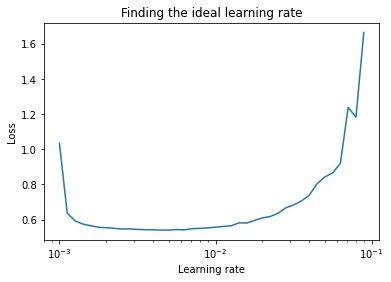

In [19]:
# Gráfico del factor de aprendizaje (learning rate)
import numpy as np

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # eje x-axis en escala logarítmica
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Según el gráfico parece que el valor óptimo podría estar alrededor de 0.001. Se reentrenará el modelo utilizando este factor de aprendizaje

In [21]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # Valor "ideal"
                metrics = ["accuracy"])

history = model_4.fit(train_data,
                      train_labels,
                      epochs = 20,
                      validation_data = (test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Luego de tener un modelo con un factor de aprendizaje adecuado y con un comportamiento relativamente adecuado, se puede realizar alguna de las siguientes alternativas.

* Evaluar su rendimiento utilizando otras métricas de clasificación (como la  [matriz de confusión](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) o un [reporte de clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Evaluar sus predicciones (a través de visualizaciónes).
* Mejorar la exactitud del modelo (entrenándo por más tiempo o modificando la arquitectura).
* Guardar el modelo y exportarlo para uso en una aplicación.

Primero se utilizará una matriz de confusión para visualizar las predicciones de las diferentes clases.

In [22]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Genera una matriz de confusión comparando las predicciones y las etiquetas reales

  Si se pasa classes, se etiquetará la matriz de confusión. De lo contrario, se utilizará
  valores enteros.

  Args:
    y_true: Arreglo de etiquetas reales (igual tamaño que y_pred).
    y_pred: Arreglo de etiquetas predichas (igual tamaño que y_true).
    classes: Arreglo de etiquetas de clase (ejm. en formato de string). Si es `None`, se usa etiquetas enteras
    figsize: Tamaño de la salida de la figura (default=(10, 10)).
    text_size: Tamaño de la salida del texto  (default=15).
  
  Returns:
    Una matriz de confusión

  """  
  # Creación de la matriz de confusión
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Gráfico de la figura
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  # Hay una lista de clases?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Etiqueta de los ejes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  # Etiquetas del eje x en la parte inferior
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Umbral para los colores
  threshold = (cm.max() + cm.min()) / 2.

  # Gráfico de texto en cada celda
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [23]:
# Predicciones con el modelo más reciente
y_probs = model_4.predict(test_data)

# Primeras 5 predicciones
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

La salida es un vector de probabilidades. Para encontrar el valor más alto (la clase más probable) se puede utilizar [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [26]:
# Clase predicha y su etiqueta, para la primera instancia
y_probs[0].argmax(), nombres[y_probs[0].argmax()]

(9, 'Ankle boot')

In [27]:
# Convertir todas las predicciones, de probabilidades a etiquetas
y_preds = y_probs.argmax(axis=1)

# Visualización de las primeras 10 predicciones
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [28]:
# Matriz de confusión de Scikit learn
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels, 
                 y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

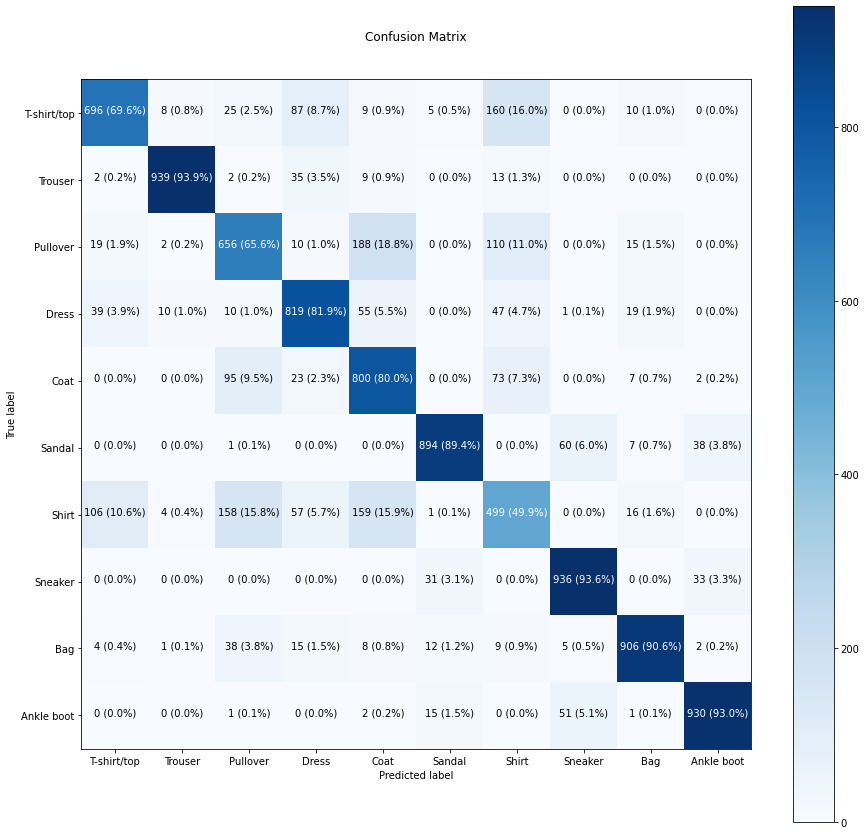

In [29]:
# Matriz de confusión gráfica
make_confusion_matrix(y_true = test_labels, 
                      y_pred = y_preds,
                      classes = nombres,
                      figsize = (15, 15),
                      text_size = 10)

Parece que el modelo se confunde entre `Shirt` y `T-shirt/top`. Para analizar y tratar de comprender un poco más este problema se puede visualizar algunos ejemplos.

In [30]:
import random

# Función que grafica una imagen aleatoria junto con su predicción
def plot_random_image(model, images, true_labels, classes):
  # Imagen aleatoria
  i = random.randint(0, len(images))
  
  # Predicciones y etiquetas
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Gráfico de la imagen
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Cambiar el color de los títulos según si la predicción es correcta o no
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

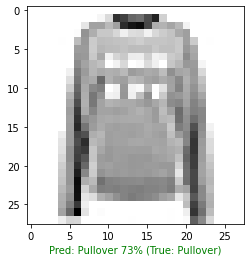

In [34]:
# Visualizar una imagen aleatoria y su predicción
plot_random_image(model = model_4, 
                  images = test_data, 
                  true_labels = test_labels, 
                  classes = nombres)

### ¿Qué patrones aprende el modelo?

Se obtendrá una lista de las capas en el modelo más reciente (`model_14`) usando el atributo `layers`.

In [35]:
# Capas del modelo más reciente
model_4.layers

In [37]:
# Extracción de una capa particular
model_4.layers[1]

Se puede encontrar los parámetros aprendidos por cada capa usando`get_weights()`, que retorna los pesos (weights) y sesgos (biases). Cada neurona tiene un vector de sesgo (bias), el cual se encuentra ligado a una matriz de pesos. Los valores de sesgo se inicializan a cero por defecto (pero pueden tener otras inicializaciones) y determinan cuánto los patrones de los pesos correspondientes deben influir en la siguiente capa.


In [38]:
# Obtener los patrones de una capa en la red
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [39]:
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

In [40]:
# Resumen del modelo
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


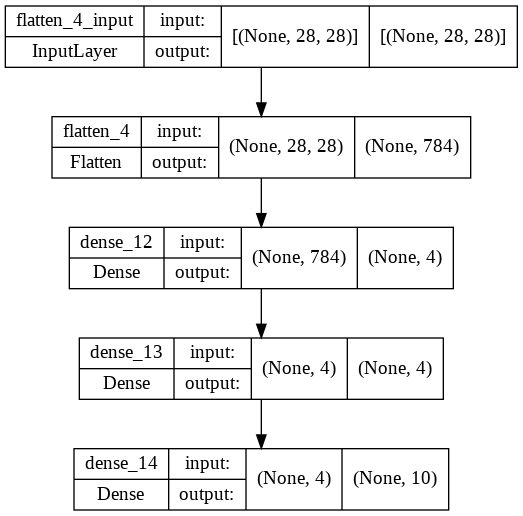

In [41]:
from tensorflow.keras.utils import plot_model

# Resumen de las entradas y salidas de cada capa
plot_model(model_4, show_shapes=True)